In [58]:
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objs as go
import datetime
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')

from math import sqrt
from sklearn.metrics import mean_squared_error

In [59]:
def rmse(predictors, validation):
    history = [x for x in predictors]  # walk-forward validation that includes next observation as the last predictor
    prediction = list()

    for i in range(len(validation)):
    # "prediction"
        y_hat = history[-1]  # last data point in history list is what we try to predict - y_hat
        prediction.append(y_hat) # the previous observation becomes historical data

    # observation
        obs = validation[i] 
        history.append(obs) # once observed, becomes historical entry

    RMSE = sqrt(mean_squared_error(validation, prediction))
    return RMSE

In [66]:
def arima_forecast(data):
    
    df = pd.read_csv(data)
    df = df.drop(['Unnamed: 0'], axis=1)
    df.date = pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    series = df['count']

    model = sm.tsa.ARIMA(series, order=(9,1,9))
    results = model.fit()
    
    df['train_forecast'] = results.predict(start=len(df) - (len(df)//4), end=len(df))
    train_forecast = df[['count', 'train_forecast']].plot(figsize=(12,8))
    
    future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,15)]
    future_df = pd.DataFrame(index = future_dates, columns=df.columns)
    final_df = pd.concat([df, future_df])
    final_df['forecast'] = results.predict(start=len(df), end=(len(df) + 14))
    final_forecast = final_df[['count', 'forecast']].plot(figsize=(12,8))
    
    #Adding in the RMSE calculation here
    X = df['count']
    X1 = X.to_numpy(dtype = "float32")
    train_size = len(X1)-15
    train, test = X1[0:train_size], X1[train_size:]

    rmse_value = rmse(train, test)
    print("RMSE: " + str(rmse_value))
    
    return train_forecast, final_forecast

RMSE: 3.750555505933538


(<AxesSubplot:xlabel='date'>, <AxesSubplot:>)

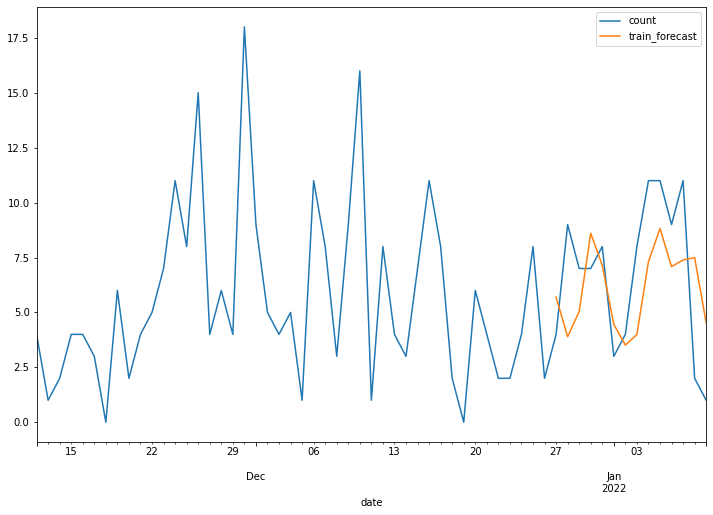

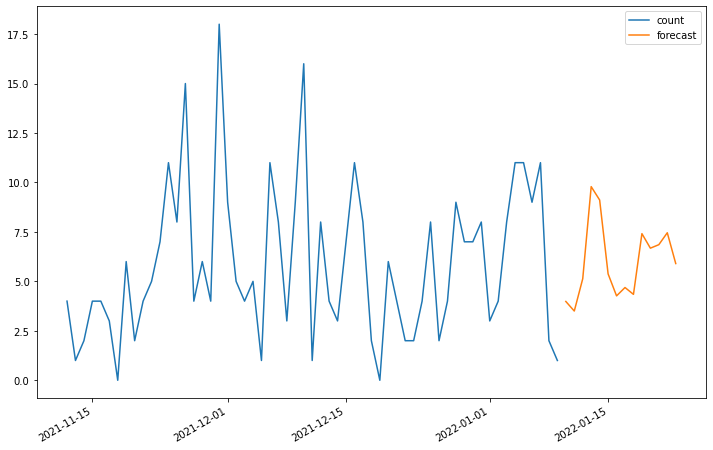

In [69]:
data = 'FRANCE.csv'

arima_forecast(data)